<a href="https://colab.research.google.com/github/Codeventure-team6/Proyek-codeventure/blob/Piter/Visualisasi_fruit_sales_data_jogja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
#2: Memuat data penjualan buah
df_main = pd.read_csv('https://raw.githubusercontent.com/Codeventure-team6/Proyek-codeventure/refs/heads/master/dataset/Fruit%20Sales%20Data.csv')
df_main

,Fruit_Name,Weight_in_Kg,Total_Cost,Purchased
0,Apple,44.0,72000.0,No
1,Mango,27.0,48000.0,Yes
2,Orange,30.0,54000.0,No
3,Strawberry,38.0,61000.0,No
4,Orange,40.0,NaN,Yes
5,Mango,35.0,58000.0,Yes
6,Apple,NaN,52000.0,No
7,Strawberry,48.0,79000.0,Yes
8,Strawberry,50.0,83000.0,No
9,Apple,37.0,67000.0,Yes


In [16]:
#3. Memuat File cabang Jogja
df_jogja = pd.read_csv("https://raw.githubusercontent.com/Codeventure-team6/Proyek-codeventure/refs/heads/master/dataset/Fruit%20Sales%20Data%20Branch%20Jogja.csv")
df_jogja

,Fruit_Name,Weight_in_Kg,Total_Cost,Purchased
0,Durian,40,79000.0,Yes
1,Melon,10,83000.0,Yes
2,Apple,47,67000.0,Yes
3,Orange,70,63000.0,No
4,Melon,59,NaN,Yes
5,Durian,40,76000.0,Yes
6,Melon,20,34000.0,No
7,Avocado,21,38500.0,Yes
8,Apple,24,38000.0,Yes


In [17]:
#4: Menggabungkan data
df_combined = pd.concat([df_main, df_jogja], ignore_index=True)

In [18]:
#5: Menormalisasi text
df_combined['Fruit_Name'] = df_combined['Fruit_Name'].str.strip().str.title()
df_combined['Purchased'] = df_combined['Purchased'].str.strip().str.capitalize()

In [19]:
#6: Menampilkan informasi nilai yang hilang
print("Nilai hilang sebelum dibersihkan:")
print(df_combined.isnull().sum())

Nilai hilang sebelum dibersihkan:
Fruit_Name      0
Weight_in_Kg    2
Total_Cost      3
Purchased       0
dtype: int64


In [20]:
#7: Membersihkan nilai yang hilang
df_cleaned = df_combined.dropna()

In [22]:
#8: Menampilkan hasil akhir
print("\nData setelah dibersihkan:")
print(df_cleaned.head())


Data setelah dibersihkan:
   Fruit_Name  Weight_in_Kg  Total_Cost Purchased
0       Apple          44.0     72000.0        No
1       Mango          27.0     48000.0       Yes
2      Orange          30.0     54000.0        No
3  Strawberry          38.0     61000.0        No
5       Mango          35.0     58000.0       Yes


<ipython-input-23-6a92b627d817>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fruit_revenue.values, y=fruit_revenue.index, palette="magma")


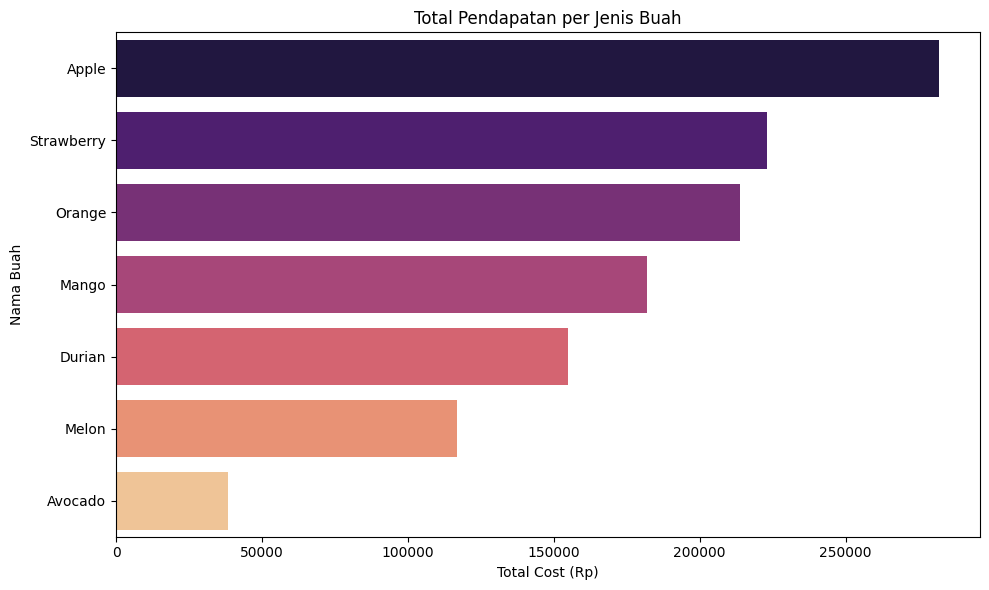

In [23]:
# 9: Visualisasi Bar Chart - Total Pendapatan per Jenis Buah
plt.figure(figsize=(10, 6))
fruit_revenue = df_cleaned.groupby('Fruit_Name')['Total_Cost'].sum().sort_values(ascending=False)
sns.barplot(x=fruit_revenue.values, y=fruit_revenue.index, palette="magma")
plt.title("Total Pendapatan per Jenis Buah")
plt.xlabel("Total Cost (Rp)")
plt.ylabel("Nama Buah")
plt.tight_layout()
plt.show()

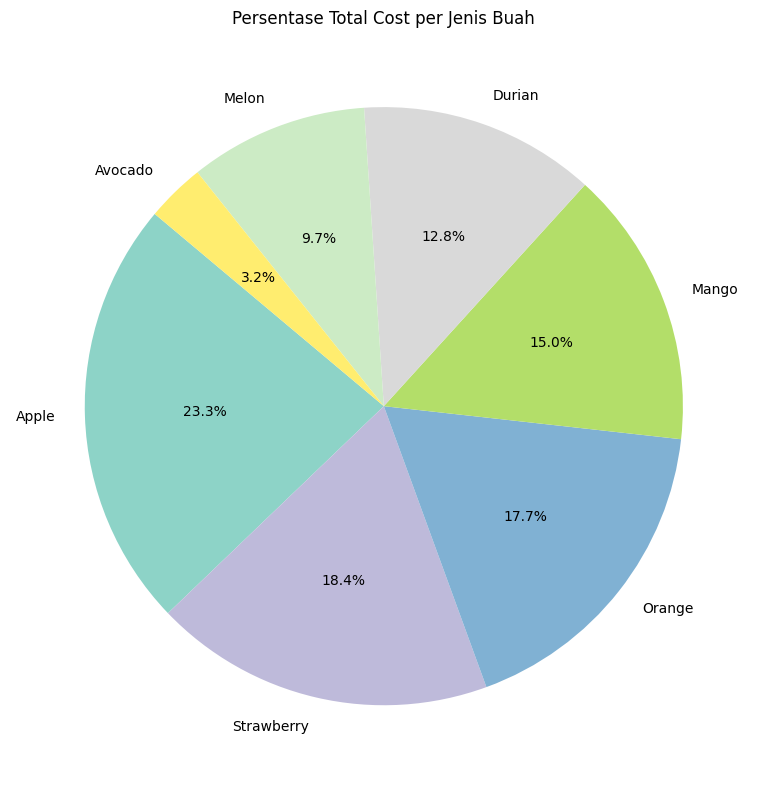

In [24]:
# 10: Visualisasi Pie Chart - Persentase Pendapatan Buah
plt.figure(figsize=(8, 8))
fruit_revenue.plot.pie(autopct='%1.1f%%', startangle=140, colormap='Set3')
plt.title("Persentase Total Cost per Jenis Buah")
plt.ylabel('')
plt.tight_layout()
plt.show()

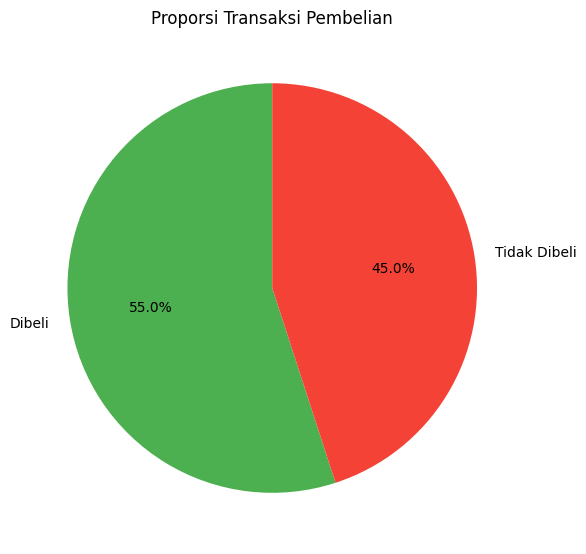

In [25]:
#11: Visualisasi Pie Chart - Proporsi Pembelian
plt.figure(figsize=(6, 6))
purchase_counts = df_cleaned['Purchased'].value_counts()
purchase_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['#4CAF50', '#F44336'],
    labels=['Dibeli' if val == 'Yes' else 'Tidak Dibeli' for val in purchase_counts.index]
)
plt.title("Proporsi Transaksi Pembelian")
plt.ylabel('')
plt.tight_layout()
plt.show()


In [26]:
# Total seluruh pendapatan
total_pendapatan = df_cleaned['Total_Cost'].sum()
print(f"\nTotal seluruh pendapatan (Total_Cost): Rp {total_pendapatan:,.0f}")

print("\nVisualisasi dan analisis selesai! 🐍")



Total seluruh pendapatan (Total_Cost): Rp 1,211,500

Visualisasi dan analisis selesai! 🐍


Koefisien regresi:
Weight_in_Kg: 608.5514
Correlation between Weight_in_Kg and Total: 0.4882508394316685

Intercept: 38454.1573
R² score: 0.2384
Mean Squared Error: 209924300.4185


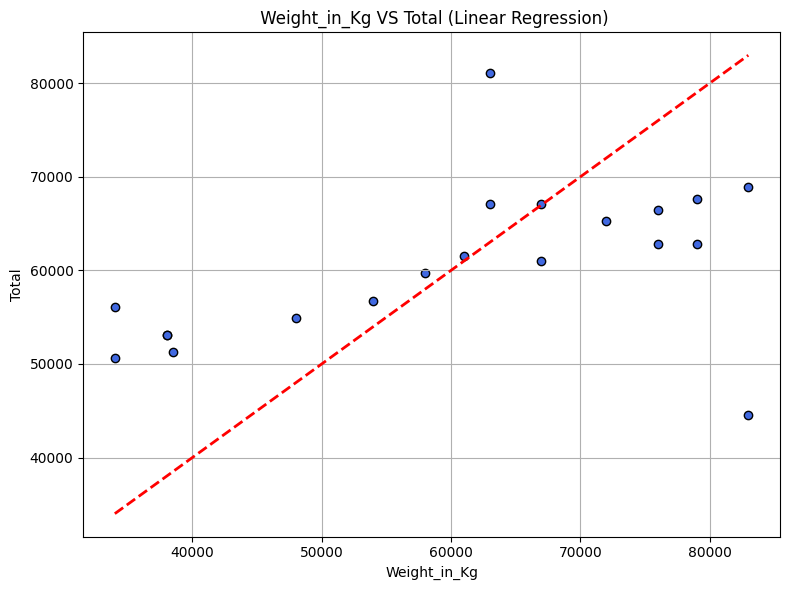

In [31]:
# ==== BONUS =====

# 2. Fitur dan target
# X is selected as a DataFrame with one column
X = df_cleaned[['Weight_in_Kg']]
y = df_cleaned['Total_Cost']

# 3. Model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# 4. Evaluasi
print("Koefisien regresi:")
# Iterate through the columns of the X DataFrame for printing
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

weight_total_correlation = df_cleaned['Weight_in_Kg'].corr(df_cleaned['Total_Cost'])

print(f"Correlation between Weight_in_Kg and Total: {weight_total_correlation}")
print(f"\nIntercept: {model.intercept_:.4f}")
print(f"R² score: {r2_score(y, y_pred):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y, y_pred):.4f}")

# 5. Scatter Plot: Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y, y_pred, color='royalblue', edgecolor='black')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
plt.xlabel('Weight_in_Kg')
plt.ylabel('Total')
plt.title(' Weight_in_Kg VS Total (Linear Regression)')
plt.grid(True)
plt.tight_layout()
plt.show()